# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
medical = pd.read_csv(r"C:\Users\mohua\OneDrive\Documents\unit11\insurance2.csv", index_col=None)

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

Q1A: Results showed that the majority will be less than 12000 region

(array([136., 106., 106.,  90.,  98.,  90.,  82.,  73.,  88.,  65.,  45.,
         17.,  19.,  20.,  28.,  20.,  22.,  13.,  19.,  12.,  11.,   9.,
          7.,   6.,   2.,   6.,  15.,  12.,  12.,  14.,  15.,  13.,  10.,
          7.,  12.,   8.,  11.,   8.,   4.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1121.8739   ,  2374.8449822,  3627.8160644,  4880.7871466,
         6133.7582288,  7386.729311 ,  8639.7003932,  9892.6714754,
        11145.6425576, 12398.6136398, 13651.584722 , 14904.5558042,
        16157.5268864, 17410.4979686, 18663.4690508, 19916.440133 ,
        21169.4112152, 22422.3822974, 23675.3533796, 24928.3244618,
        26181.295544 , 27434.2666262, 28687.2377084, 29940.2087906,
        31193.1798728, 32446.150955 , 33699.1220372, 34952.0931194,
        36205.0642016, 37458.0352838, 38711.006366 , 39963.9774482,
        41216.9485304, 42469.9196126, 43722.8906948, 44975.861777 ,
        46228.8328592, 47481.8039414, 48734.77

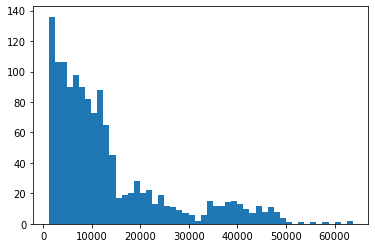

In [4]:
plt.hist(medical.charges, bins=50)

In [5]:
charges_mean=medical.charges.mean()
charges_std=medical.charges.std()
print('The average charge is ',charges_mean)
print('The standard deviation is ',charges_std)

The average charge is  13270.422265141257
The standard deviation is  12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

Q2A:The data seems like to an exponential distribution curve. The actual data may seems like a normal distribution curve. The standard deviation is very high. The data were spread out. Therefore need to setup a model and get more data to see. To test the hypotheseis, the exponential distribution model and norm model were both used. The python program is shown below

In [6]:
# random select data with exponential distribution and norm distribution.
seed(47)
charge_expon =expon.rvs(13270,12110,size=1338)
charge_expon_mean=charge_expon.mean()
charge_expon_std=charge_expon.std()
print('The average charge by expontential model is ',charge_expon_mean)
print('The standard deviation by expontential model is ',charge_expon_std)

charge_norm=norm.rvs(13270, 12110, size=1338)
charge_norm_mean=charge_norm.mean()
charge_norm_std=charge_norm.std()
print('The average charge by norm model is ',charge_norm_mean)
print('The standard deviation by norm model is ',charge_norm_std)

# Results indicated that norm model will provide a better fit in both mean and standard deviation

The average charge by expontential model is  25911.626846324838
The standard deviation by expontential model is  12231.505183410993
The average charge by norm model is  13476.176674505354
The standard deviation by norm model is  12023.236220483128


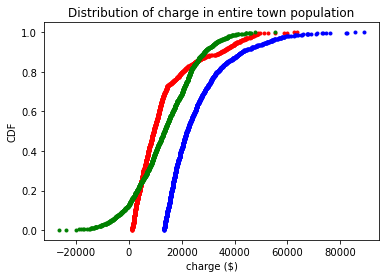

In [7]:
#Check by CDF model. here will be three CDF curve. A better model will fit the raw data better

# define ECDF (CDF function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#computer CDF, x_original,y_original are from raw data from the charge. 
#x_expon,y_exon are from simulated data from exponential distribution
#x-norm,y_norm are from simulated data from normal distribution
x_original,y_original=ecdf(medical.charges)
x_expon,y_expon=ecdf(charge_expon)
x_norm,y_norm=ecdf(charge_norm)

plt.plot(x_original , y_original, marker='.',linestyle='none',color='red')
plt.plot(x_expon , y_expon, marker='.',linestyle='none',color='blue')
plt.plot(x_norm , y_norm, marker='.',linestyle='none',color='green')

_ = plt.xlabel('charge ($)')
_ = plt.ylabel('CDF')
_ = plt.title('Distribution of charge in entire town population')

#Results showed that normal distribution fit the raw data better. So need to use normal distribution to simulate the results


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

Q3A:Although the raw data showed that chances below $12000 is around 63%. After using a better model, the chances to get below $12000 was 0.5%

In [8]:
#The confidence interval will be calculated based on the raw data
confidence_interval=np.percentile(medical.charges,[0.25,97.5])
print('Based on the original random data, 95% confidence_interval=', confidence_interval)

Based on the original random data, 95% confidence_interval= [ 1136.608873 46007.13095 ]


In [9]:
#The confidence interval calculated based on the simulation by normal distribution (10000)
seed(47)
charge_norm=norm.rvs(13270, 500, size=100000)
confidence_interval_simulated=np.percentile(charge_norm,[0.25,97.5])
charge_norm_mean=charge_norm.mean()
print('Based on the simulated random data, 95% confidence_interval=', confidence_interval_simulated)
print('Based on the simulated random data, The mean is', charge_norm_mean)

Based on the simulated random data, 95% confidence_interval= [11868.96874286 14254.40934945]
Based on the simulated random data, The mean is 13271.696705767266


In [10]:
#possibility to get lower than 12000 by simulation
threshold=12000
size=len(charge_norm)
p_simulated=np.sum(charge_norm<=threshold)/len(charge_norm)*100
print('Based on the simulation model, possibilty to get less than $12000 charge is',p_simulated,'%')

Based on the simulation model, possibilty to get less than $12000 charge is 0.528 %


In [11]:
#possiblility to get lower than 12000 by raw data
p_original=np.sum(medical.charges<=threshold)/len(medical.charges)*100
print('Based on the distibution of raw data, possibilty to get less than $12000 charge is',p_original,'%')

Based on the distibution of raw data, possibilty to get less than $12000 charge is 63.22869955156951 %


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

Q4A:The whole selected samples disttribution are the same as the whole distribution

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

Q5A:Yes. They are charging the different rate 

In [12]:
#check the type of the medical
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [13]:
# separate data based on whether there is insurance or not
medical_original=medical
medical_original.head()
size=len(medical_original.insuranceclaim)
#charge_insurance=np.empty(size)
#charge_no_insurance=np.empty(size)
insurance= medical[medical['insuranceclaim'] == 1]
insurance.head()
insurance_data_count=insurance.count()
no_insurance=medical[medical['insuranceclaim']==0]
no_insurance_data_count=no_insurance.count()
no_insurance.head() 

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [14]:
#calculate the test statistical
insurance_mean=insurance['charges'].mean()
insurance_std=insurance['charges'].std()
no_insurance_mean=no_insurance['charges'].mean()
no_insurance_std=no_insurance['charges'].std()
print('The average charge with insurance is ',insurance_mean,)
print('The average standard deviation of charge with insurance = ',insurance_std)
print('The average charge without insurance is ',no_insurance_mean,)
print('The average standard deviation of charge without insurance = ',no_insurance_std)

The average charge with insurance is  16423.928276537663
The average standard deviation of charge with insurance =  14045.928418802127
The average charge without insurance is  8821.421892306294
The average standard deviation of charge without insurance =  6446.510126811736


In [15]:
#Sp
n0=insurance_data_count['charges']
n1=no_insurance_data_count['charges']
s0=insurance_std
s1=no_insurance_std
sp=np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2))
print(sp)
x0=insurance_mean
x1=no_insurance_mean
t=(x0-x1)/(sp*np.sqrt(1/n0+1/n1))
print(t)

11520.034268775256
11.89329903087671


In [16]:
#Compute the t-test for the means of two independent samples of scores
from scipy.stats import ttest_ind
x = insurance['charges']
y = no_insurance['charges']

t_statistic, p_value = ttest_ind(x, y)
print (t_statistic)
print(p_value)

11.893299030876712
4.461230231620717e-31


(array([66., 91., 98., 72., 56., 45., 40., 16., 10., 13., 11.,  9.,  4.,
         8.,  6.,  3.,  2.,  2.,  0.,  3.]),
 array([ 1121.8739   ,  2911.3106065,  4700.747313 ,  6490.1840195,
         8279.620726 , 10069.0574325, 11858.494139 , 13647.9308455,
        15437.367552 , 17226.8042585, 19016.240965 , 20805.6776715,
        22595.114378 , 24384.5510845, 26173.987791 , 27963.4244975,
        29752.861204 , 31542.2979105, 33331.734617 , 35121.1713235,
        36910.60803  ]),
 <a list of 20 Patch objects>)

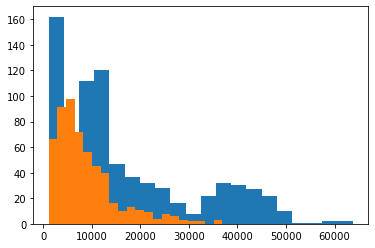

In [17]:
#plot insurance and uninsurance sample distribution
plt.hist(insurance.charges, bins=20)
plt.hist(no_insurance.charges, bins=20)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

Q6A:Z-test need to have a better norm distribution. It is possible to have Z test after separating insurance factor.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test